In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ArnabBiswas/Documents/Data/Kaggle Dataset/BMW_Data.csv')

In [8]:
df.head()

,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


In [5]:
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

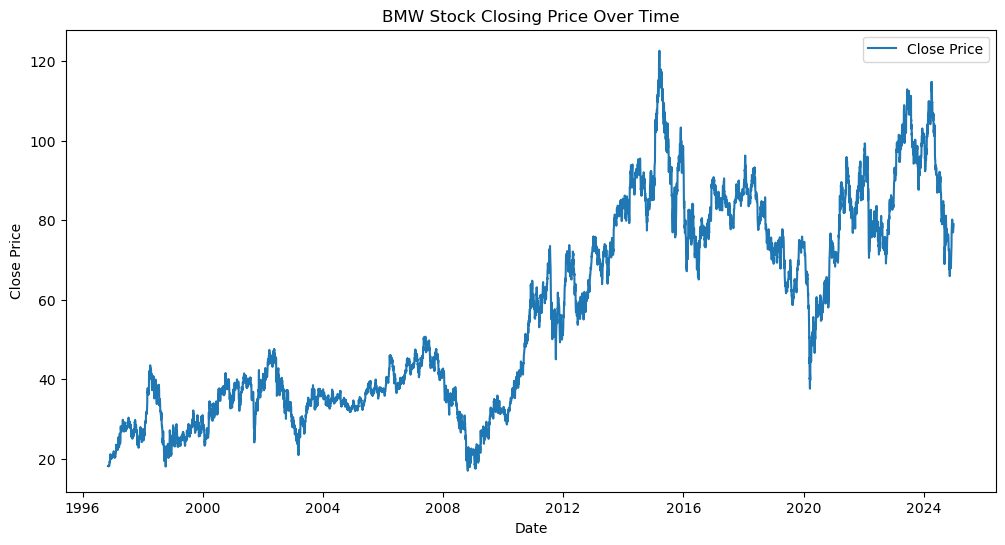

In [10]:
# Time Series Plot - Closing Price

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('BMW Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

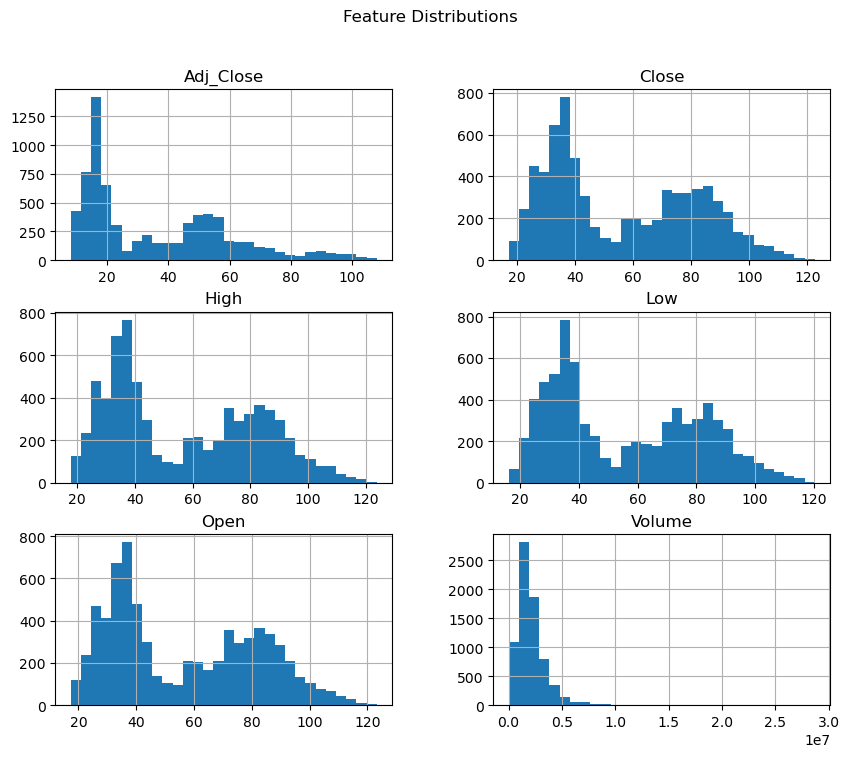

In [12]:
# Feature Distribution

# Histogram for distributions
df.hist(figsize=(10, 8), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

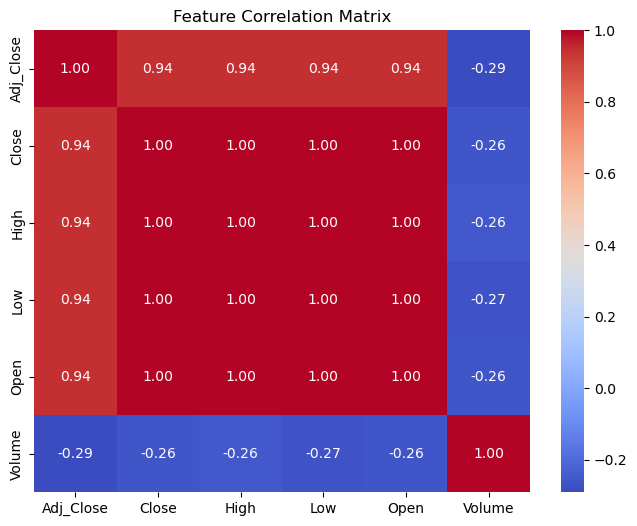

In [14]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

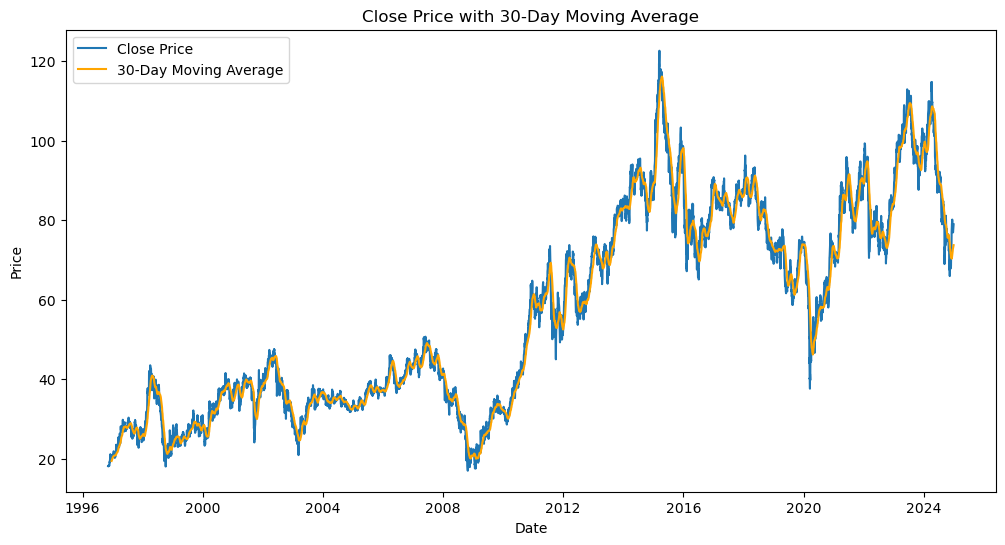

In [16]:
# Rolling Mean (Trend Analysis)

df['Close_30Day_Mean'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Close_30Day_Mean'], label='30-Day Moving Average', color='orange')
plt.title('Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

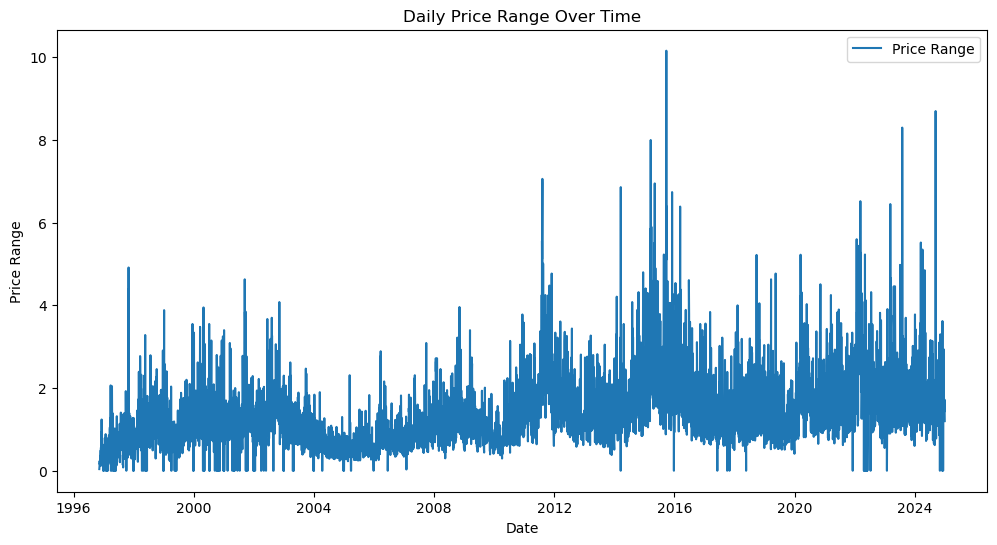

In [17]:
# Price Range Analysis

df['Price Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price Range'], label='Price Range')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

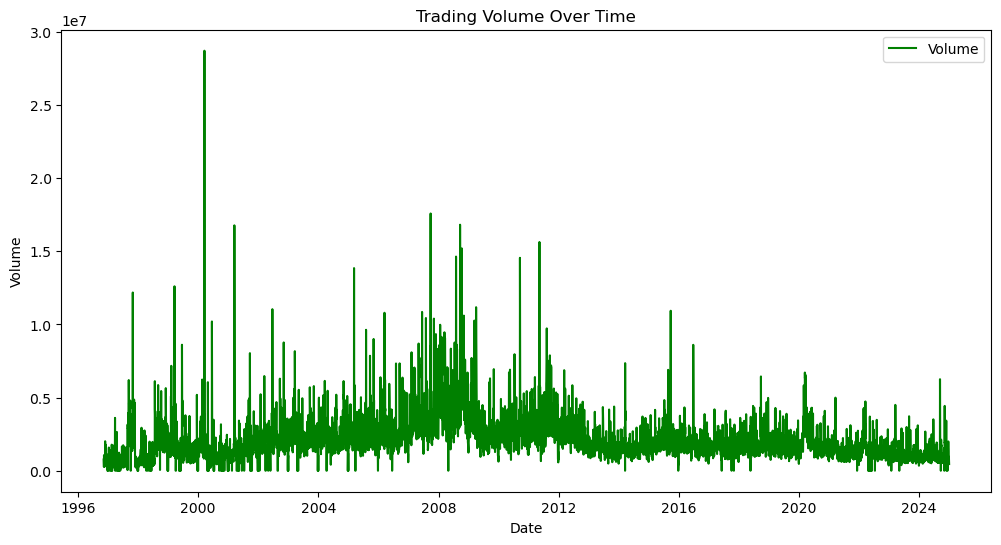

In [18]:
# Volume analysis

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

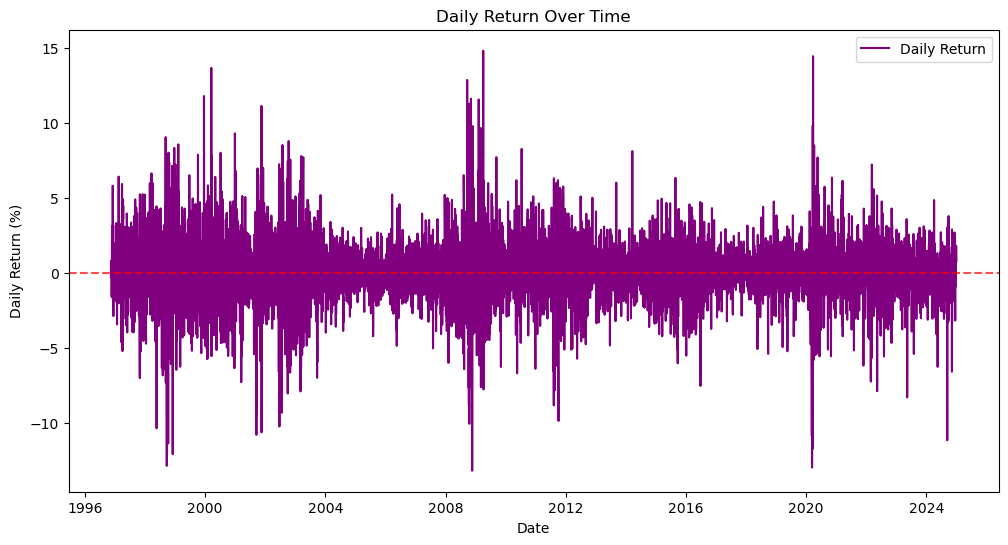

In [19]:
# Volatility Analysis

df['Daily Return'] = df['Close'].pct_change() * 100  # Percentage daily return

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='purple')
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

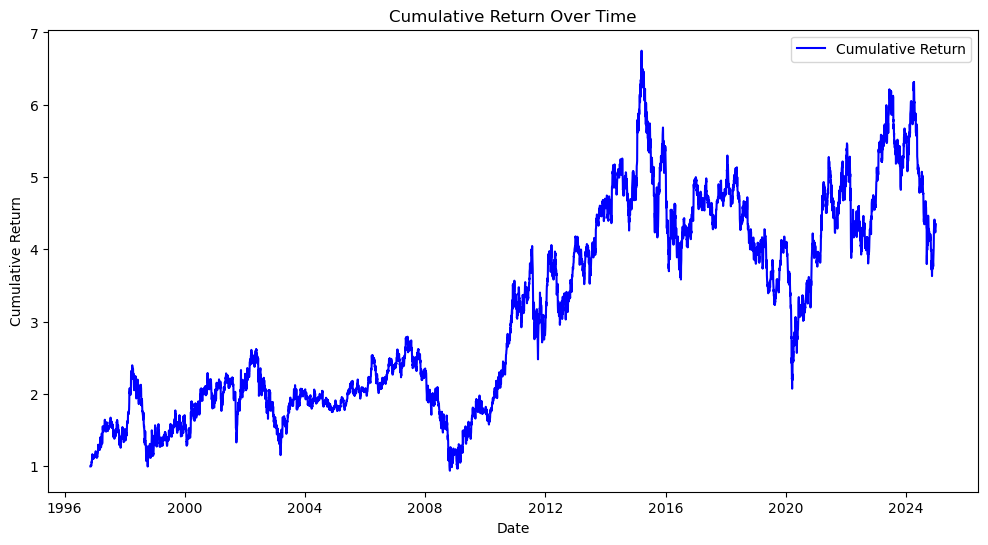

In [20]:
# Cumulative Returns

df['Cumulative Return'] = (1 + df['Daily Return'] / 100).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

### Predictive Modelling

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [22]:
# Feature Engineering - Creating new features

#Create new features
df['Price Range'] = df['High'] - df['Low']
df['Daily Return'] = df['Close'].pct_change()
df['7-Day Moving Avg'] = df['Close'].rolling(window=7).mean()
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Drop rows with NaN values (created by rolling windows)
df.dropna(inplace=True)

# Define the features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Price Range', 'Daily Return', '7-Day Moving Avg', '30-Day Moving Avg']]
y = df['Close']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [24]:
# Standardizing 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Rabdom Forest Regressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [26]:
# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 0.4057662292851781
Mean Squared Error: 0.29488009210607524
R2 Score: 0.9987756677251914


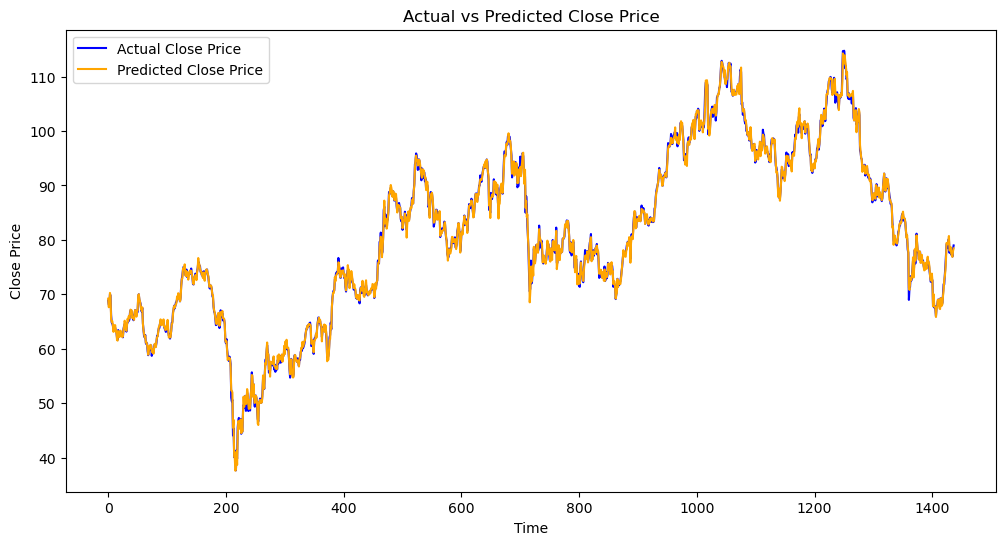

In [27]:
# Visualize the predictions

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

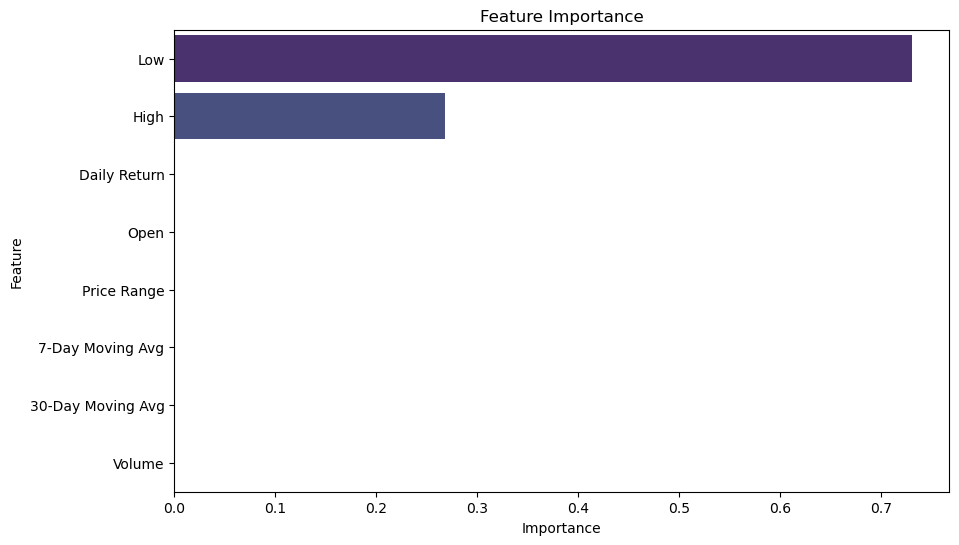

In [29]:
# Feature Importance

import pandas as pd
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [30]:
# Make Future predictions

# Example: Predict for new data
future_data = [[100, 102, 99, 5000000, 3, 0.01, 101, 100]]  # Replace with real future data
future_data_scaled = scaler.transform(future_data)
future_prediction = model.predict(future_data_scaled)
print("Predicted Close Price:", future_prediction[0])

Predicted Close Price: 100.38249947079997


C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
